# Exercise 1: Text Classification (10 points)

Based on your implementation of the `Corpus` and `Document` classes from the previous assignment, you will now build a simple Naive Bayes classifier to classify each document in the test section of the Reuters News corpus. 

We will use the TF-IDF metric as the feature for our classifier. TF-IDF of a term $t$ in a document $d$ is defined as:

\begin{equation}
  \text{TF-IDF}(t,d) = \frac{
    \text{TF}(t,d)
  }{
    \text{IDF}(t)
  }
\end{equation}

with $\text{TF}(t,d)$ being the defined as

\begin{equation}
  \text{TF}(t,d) = \frac{
    f_{t,d}
  }{
    \sum_{t'} f_{t',d}
  }
\end{equation}

where $f_{t,d}$ is the absolute frequency of term $t$ in document $d$.

and $\text{IDF}(t)$ being defined as 

\begin{equation}
  \text{IDF}(t) = \frac{
    N
  }{
    |\{d \in D: C_d(t) > 0\}|
  }
\end{equation}

where $D$ stands for the documents in the corpus, $N=|D|$ and $C_d(t)$ is the number of times term $t$ occurs in document $d$.

In a TF-IDF matrix, documents are represented by the rows of the matrix and TF-IDF features by its columns. This means that each row vector consists of the TF-IDF value for a term taken from a fixed, shared vocabulary given the document, i. e. $\text{TF-IDF}(t,d)$, for $t \in V$ ([this](https://www.researchgate.net/profile/Maryam-Hourali/publication/306358542/figure/tbl1/AS:648973966651395@1531738859631/Some-Part-of-TF-IDF-Term-Document-Matrix.png) is a small example). 

## 1.1 Vocabulary as feature space (2 points)

Construct a shared vocabulary $V$ for the Reuters corpus, using both the train set and the test set. You are expected to reduce the size of the vocabulary by 
  * Preprocessing (removing punctuation, lowercasing, tokenizing). (0.25 points)
  * Lemmatizing the tokenized text. (0.5 points)
  * Setting a $\text{min_df}$ and $\text{max_df}$ and removing all terms from the vocabulary that occur in less then $\text{min_df}$ and more than $\text{max_df}$ documents. You should support your choice with a source from the internet or your own reasoning. (0.5 point)
  * Why is it necessary to reduce the size of the vocabulary and to set a lower and upper bound to document frequency? Explain in 2-3 sentences. (0.25 points)

You are allowed to use any Python package useful to the task. We suggest using NLTK's [RegexpTokenizer](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.regexp.RegexpTokenizer) for tokenization and [WordNetLemmatizer](https://www.nltk.org/api/nltk.stem.html#nltk.stem.wordnet.WordNetLemmatizer) for lemmatization. The implementation should be in the `reduce_vocabulary` method of the `Corpus` class. Check that your implementation is correct by executing the code cell below and comparing vocabulary sizes before and after the reduction. 
  
As always, you are free to define new methods as you need them.  

In [4]:
# Data loading
!pip install nltk
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('wordnet')
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

from nltk.corpus import reuters, stopwords
stop_words = stopwords.words('english')  

Streaming output truncated to the last 5000 lines.
  inflating: /root/nltk_data/corpora/reuters/training/2231  
  inflating: /root/nltk_data/corpora/reuters/training/2232  
  inflating: /root/nltk_data/corpora/reuters/training/2234  
  inflating: /root/nltk_data/corpora/reuters/training/2236  
  inflating: /root/nltk_data/corpora/reuters/training/2237  
  inflating: /root/nltk_data/corpora/reuters/training/2238  
  inflating: /root/nltk_data/corpora/reuters/training/2239  
  inflating: /root/nltk_data/corpora/reuters/training/2240  
  inflating: /root/nltk_data/corpora/reuters/training/2244  
  inflating: /root/nltk_data/corpora/reuters/training/2246  
  inflating: /root/nltk_data/corpora/reuters/training/2247  
  inflating: /root/nltk_data/corpora/reuters/training/2249  
  inflating: /root/nltk_data/corpora/reuters/training/225  
  inflating: /root/nltk_data/corpora/reuters/training/2251  
  inflating: /root/nltk_data/corpora/reuters/training/2252  
  inflating: /root/nltk_data/corpor

In [5]:
import sys
sys.path.append('/exercise_1.py')

import sys
sys.path.append('/exercise_1.py')

from importlib import reload
import exercise_1
exercise_1 = reload(exercise_1)
from tqdm import tqdm

print("Loading Reuters corpus...")
corpus = exercise_1.Corpus(
    documents=[
    exercise_1.Document(fileid, reuters.raw(fileid), reuters.categories(fileid), stop_words=stop_words) 
    for fileid in tqdm(reuters.fileids())],
    categories=reuters.categories()
)
print("\nVocab size before reduction:", len(corpus.terms()))

# TODO: set min_df, max_df
min_df = 0.0001
max_df = 0.5

reduced_vocab = corpus.reduce_vocab(min_df=min_df, max_df=max_df)

# removing unwanted numericals
reduced_vocab.sort()
for i in range(reduced_vocab.index('aa')):
    reduced_vocab.pop(0)

print("\nVocab size after reduction:", len(reduced_vocab))

  0%|          | 0/10788 [00:00<?, ?it/s]

Loading Reuters corpus...


100%|██████████| 10788/10788 [00:13<00:00, 774.16it/s]



Vocab size before reduction: 48174
{'reserve': 0.057007786429365964, 'u': 0.20114942528735633, 'export': 0.09130515387467557, '71': 0.00482017055988135, 'fiscal': 0.031053021876158694, 'sell': 0.060252131998516874, 'sale': 0.1660177975528365, 'told': 0.10910270671116055, 'asia': 0.004727474972191324, 'estimate': 0.032721542454579165, 'view': 0.01557285873192436, 'directorgeneral': 0.0006488691138301817, 'matsushita': 0.00027808676307007786, 'yesterday': 0.05088987764182425, 'taiwan': 0.009733036707452725, 'swell': 0.0001853911753800519, 'textile': 0.005654430849091583, 'row': 0.0055617352614015575, 'produced': 0.014089729328883945, 'country': 0.08083055246570263, 'disadvantage': 0.0010196514645902854, 'cost': 0.05543196143863552, 'pressure': 0.025120504263997034, 'year': 0.33880237300704485, 'quickly': 0.007971820541342232, 'newspaper': 0.012328513162773452, 'failure': 0.008713385242862439, 'tom': 0.001946607341490545, 'murtha': 0.0003707823507601038, 'coal': 0.005839822024471635, 'ta

## 1.2 TF-IDF matrix (2 points)

1. Implement the method `_idfs` of the `Corpus` class. It should take the reduced vocabulary as input and return a dictionary containing the IDFs of each word in the reduced vocabulary. Print the IDFs of the first 10 terms (sorted lexicographically) from the reduced vocabulary. Store the IDFs in a class variable `idfs`. Why is it a good idea to calculate IDFs first? (1 points)

2. Implement the method `_tfs_idfs` of the corpus class. It should return a vector or a a list containing the TF-IDFs of all terms in the reduced vocabulary for a single document. It should use the `_idfs` method once internally. (1 point).

In [6]:
idfs = corpus._idfs(reduced_vocab)

print("Estimating idfs")
for term in reduced_vocab[:10]:
  print(term, idfs[term])

Estimating idfs
aa 11.397139806235604
aaa 12.397139806235602
aaron 11.812177305514448
ab 7.696700088094511
abandon 9.696700088094511
abandoned 8.642252304072136
abandoning 10.589784884178
abandonment 11.812177305514448
abastecimento 12.397139806235602
abated 12.397139806235602


## 1.3 Train/test split (1.5 points)

1. Implement the method `_category2index`. It should take a string (the name of the category) as input and return its index in the `Corpus`-internal list of categories. (0.25 points)
2. Implement the method `compile_dataset` of the `Corpus` class. It should take the reduced vocabulary as input and return two tuples: (train TF-IDF matrix, train labels) and (test TF-IDF matrix, test labels). The train matrix/labels should be derived from the train section of the Reuters dataset (file-ids starting with `training/`) and the test matrix/labels from the test section (file-ids starting with `test/`).

  Make use of the methods `_tf_idfs` and `_category2index` (1 point)

3. Use the method `compile_dataset` to load the train and test data into variables. Please name the variables such that we can distinguish the train data from the test data. Show the size of the train and test set. (0.25 points)

In [7]:
# TODO: load train and test data
(train_idfs, train_labels), (test_idfs, test_labels) = corpus.compile_dataset(reduced_vocab, idfs)

# Show size of train and test set

#train
print(" No. of rows in train TF-IDF matrix: ",len(train_idfs))
print(" No. of columns in train TF-IDF matrix: ",len(train_idfs[0]))
print(" No. of labels in train: ",len(train_labels))

#test
print(" No. of rows in test TF-IDF matrix: ",len(test_idfs))
print(" No. of rows in test TF-IDF matrix: ",len(test_idfs[0]))
print(" No. of labels in test: ",len(test_labels))

 No. of rows in train TF-IDF matrix:  7769
 No. of columns in train TF-IDF matrix:  15946
 No. of labels in train:  7769
 No. of rows in test TF-IDF matrix:  3019
 No. of rows in test TF-IDF matrix:  15946
 No. of labels in test:  3019


## 1.4: Naive Bayes Classifier (5 points)

A Naive Bayes classifier assigns a datapoint $x = x_1,...x_n$ to a class $C_k$ ($1 \leq k \leq K$, with $K$ being the number of classes) with probability $P(C_k|x)$ given by:

\begin{equation}
  p(C_k|x) = \frac{
    p(C_k)p(x|C_k)
  }{
    p(x)
  }
\end{equation}

1.  Describe the idea behind Naive Bayes in 3-4 sentences. Do so by explaining the terms 'naive' and 'Bayes(ian)' (1 point)

2. For each part of the above formula, assign it to one of the following categories, and give a short explanation. (1 point)
  * Prior
  * Posterior
  * Likelihood
  * Evidence

3. In our dataset from 1.3, what corresponds to $C_k$? What to $x$? (0.5 points)

4. What is a good baseline for estimating the accuracy of our classifier? How would you evaluate it? Explain in 1-2 sentences **and** support your answer with code. This will also help you check the accuracy you get on the actual data. (1 point)

5. Train a Naive Bayes classifier on the train section of our dataset and report precision, accuracy and F-score on the test section. You may use the class [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) and the method [precision_recall_fscore](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) from the [scikit-learn](https://scikit-learn.org/stable/install.html) Python package. You can write the code in the code cell below. (2 points)
  
6. Do you observe a difference in the F-scores of different classes? Why? What could you do to account for your finding? (0.5 points)

In [8]:
# TODO: Find accuracy of baseline classifier

# TODO: train classifier, report precision, recall, fscore
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_idfs, train_labels)
predicted_labels = model.predict(test_idfs)

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_labels, predicted_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.59717314, 1.        , 0.5       , 0.42857143, 0.42857143,
        0.        , 0.75      , 1.        , 0.        , 0.62857143,
        0.4375    , 0.32394366, 0.6       , 0.6       , 0.        ,
        0.57198444, 0.        , 0.58333333, 0.        , 0.77987421,
        1.        , 0.66666667, 0.11538462, 0.        , 0.47058824,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.55263158, 0.57142857, 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.66666667, 1.        ,
        0.        , 0.5       , 0.28301887, 0.68      , 0.        ,
        0.25      , 0.        , 0.66666667, 1.        , 0.        ,
        1.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.        , 0.        , 1.        ,
        0.45454545, 0.        , 0.        , 0.        , 0.5       ,
        0.85714286, 0.        , 1.        , 0.42477876, 0.        ,
        1.        , 0.        , 0.        ]),
 a

## Exercise 1: Text Classification - Answers

#1.1

  * We can figure out $\text{min_df}$ and $\text{max_df}$ through hyperparameter optimization - trying different possible values until we get desirable results.

  * It is necessary to reduce the size of the vocabulary and to set a lower and upper bound to document frequency in order to find stuff that's meaningful in a document by finding stuff that's frequent in the document but rare in the corpus. Word that appears in one document and nowhere else in the corpus might just be a name or a typo. We may get better results by ignoring that word and counting words that show up in the corpus at least a few times.

#1.4

1. Naive Bayes is a classification technique based on Bayes theorem with an assumption of independence among predictors. Naive Bayes assumes that presence of particlular feature in a class in unrelated to presence of any other feature even if these features depend on each other or upon existence of other features. All of these properties independently contrinute to the property. 

2. \begin{equation}
  p(C_k|x) = \frac{
    p(C_k)p(x|C_k)
  }{
    p(x)
  }
\end{equation}

  * Prior - How probable was our $C_k$ before observing the $x$ \
$ p(C_k) $

  * Posterior - How probable is our $C_k$ given the observed $x$ \
$p(C_k|x)$

  * Likelihood - How probable is the $x$ given that our $C_k$ is true \
$p(x|C_k)$

  * Evidence - How probable is the new $x$ under all possible $C_k$ \
$p(x)$   

3. $C_k$ corresponds to category and $x$ corresponds to individual terms.

## Bonus: Support Vector Machines (1.5 points)

Consider the task of Named Entity Recognition. In a simplified scenario, you want to decide for each word if it belongs to one of the following classes: {not-named-entity, person, city, country, currency}. An expert in the field tells you that you should start with the following set of features:
- is the whole word in capitals
- is the first letter capitalized
- does it begin a sentence
- number of characters 
- is a stopword
- number of Wikipedia articles that contain this word in their title


1. Come up with at least 3 more features for this problem. (0.2 points)
2. How can we numerically represent each datapoint? What is the mathematical object called and what is the set in which it lives? (0.2 points)
3. What is a hyperplane and how can it be used in this context? (0.2 points)
4. Imagine that you've been given two features: $f_1, f_2$ and the following dataset. The task is currently only to distinguish between two classes. Draw the points and 3 hyperplanes:
  - one that mispredicts at least one datapoint
  - one that predicts everything correctly
  - one that predicts everything correctly but is in some sense worse than the previous one

|Data point|$f_1$|$f_2$|class|
|---|---|---|---|
|$d_1$|2|2|Y|
|$d_2$|10|9|Y|
|$d_3$|2|5|Y|
|$d_4$|3|5|Y|
|$d_5$|2|-2|N|
|$d_6$|10|0|N|
|$d_7$|10|-4|N|
|$d_8$|3|3|N|

  In all cases provide the formula for the hyperplane and explain how to use it to make a decision regarding which class it belongs to. (0.65 points)

5. In the previous question, you created hyperplanes that helped you in determining which of the two classes the datapoint belongs to. How would you extend this to solve the original problem, i.e. predicting which of the 5 classes the datapoint belongs to? (0.25 points)

## Bonus: Answers

1. 3 more features for this problem
    - is there an equivalent symbol for the word
    - number of UN reports that contain this word
    - is their a social media account on any platform for this word
    

2. To numerically represent each datapoint, we have to convert the categorical data into numeric. To do this we can simply apply Label Encoder, assign a numeric value to each labelled data. In SVM, the mathematical Object is called the vectors in which the datapoints closer to each other where both are from different classes. We use Support vectors to find the optium classification of the datapoints and avoid the anomaly. The Set in which it lives is Support Vectors.

3. Hyper plane is a subspace whose dimension is one less than its ambient space. In SVM it is the subspace which is used to separate data into classes. Here it is used to find the clear distinction between the class datapoints. We find the Maximum Margin Hyperplane, which is at an equal distance from the closest datapoints of the class. We find the maximum length of the support vectors to identify the maximum Hyperplane. Using this Hyperplane we can easily classify the new datapoints to the Class labels without any overlap of the points.

4. Draw the points and 3 hyperplanes

|Data point|$f_1$|$f_2$|class|
|---|---|---|---|
|$d_1$|2|2|Y|
|$d_2$|10|9|Y|
|$d_3$|2|5|Y|
|$d_4$|3|5|Y|
|$d_5$|2|-2|N|
|$d_6$|10|0|N|
|$d_7$|10|-4|N|
|$d_8$|3|3|N|

(a) One that mispredicts at least one datapoint: here all the datapoint from the above table are plotted and the three Hyperplanes are identified. 
    - The Positive Hyperplane is the black dashed line closer to Y class.
\begin{equation}
 w^T x_a + b = 1 =>
 0.5625x_a - 1.125 = 1
\end{equation}
    - The Negative Hyperplane is the black dashed line closer to N class.
\begin{equation}
 w^T x_b + b = -1 =>
 0.5625x_b - 1.125 = -1
\end{equation}
    - The Maximum Margin Hyperplane is the red line in between the two classes.
\begin{equation}
 w^T x + b = 0 =>
 0.5625x - 1.125 = 0
\end{equation}

all the points which are above the Positive Hyperplane will be under class Y, all below the Negative Hyperplane will be under class N. For the points in between these to planes, if above the Maximum Margin Hyperplane will be in class Y and below the Maximum Margin Hyperplane will be in class N.

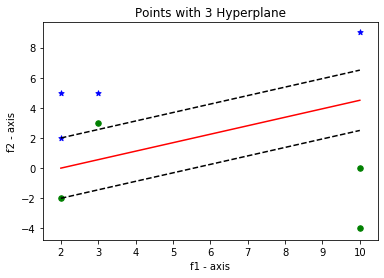

In [ ]:
from importlib import reload
import bonus
bonus = reload(bonus)

Y_f1 = [2,10,2,3]
Y_f2 = [2,9,5,5]
N_f1 = [2,10,10,3]
N_f2 = [-2,0,-4,3]

bonus.plot_bonus(Y_f1,Y_f2,N_f1,N_f2)

4. To ensure the correct prediction of everything we change the class of one datapoint $d_8$ from N to Y 

|Data point|$f_1$|$f_2$|class|
|---|---|---|---|
|$d_1$|2|2|Y|
|$d_2$|10|9|Y|
|$d_3$|2|5|Y|
|$d_4$|3|5|Y|
|$d_5$|2|-2|N|
|$d_6$|10|0|N|
|$d_7$|10|-4|N|
|$d_8$|3|3|Y|

(b) One that predicts everything correctly
    - The Positive Hyperplane is the black dashed line closer to Y class.
\begin{equation}
 w^T x_a + b = 1 =>
 0.5625x_a - 1.125 = 1
\end{equation}
    - The Negative Hyperplane is the black dashed line closer to N class.
\begin{equation}
 w^T x_b + b = -1 =>
 0.5625x_b - 1.125 = -1
\end{equation}
    - The Maximum Margin Hyperplane is the red line in between the two classes.
\begin{equation}
 w^T x + b = 0 =>
 0.5625x - 1.125 = 0
\end{equation}

all the points which are above the Positive Hyperplane will be under class Y, all below the Negative Hyperplane will be under class N. For the points in between these to planes, if above the Maximum Margin Hyperplane will be in class Y and below the Maximum Margin Hyperplane will be in class N.

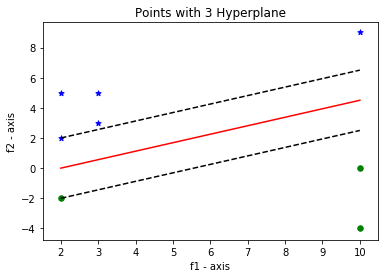

In [ ]:
Y_f1 = [2,10,2,3,3]
Y_f2 = [2,9,5,5,3]
N_f1 = [2,10,10]
N_f2 = [-2,0,-4]
bonus.plot_bonus(Y_f1,Y_f2,N_f1,N_f2)

(c). One that predicts everything correctly but is in some sense worse than the previous one
        - The Positive Hyperplane is the black dashed line closer to Y class.
\begin{equation}
 w^T x_a + b = 1 =>
 0x_a - 1 = 1
\end{equation}
    - The Negative Hyperplane is the black dashed line closer to N class.
\begin{equation}
 w^T x_b + b = -1 =>
 0x_b - 1 = -1
\end{equation}
    - The Maximum Margin Hyperplane is the red line in between the two classes.
\begin{equation}
 w^T x + b = 0 =>
 0x - 1 = 0
\end{equation}

all the points which are above the Positive Hyperplane will be under class Y, all below the Negative Hyperplane will be under class N. For the points in between these to planes, if above the Maximum Margin Hyperplane will be in class Y and below the Maximum Margin Hyperplane will be in class N.

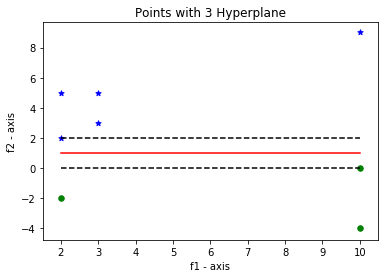

In [ ]:
bonus.plot_partc(Y_f1,Y_f2,N_f1,N_f2)

5. To extend the concept of Hyperplanes for categorizing between 5 Classes of Datapoint, we will create a have to create multiple binary classification. 
    - We have to Identify if the Data point is in Class 1 or not and a Hyperplane between this distinction. 
    - For the Datapoints under not in Class 1, we will split them as in Class 2 or not and a Hyperplane between this distinction. 
    - For the Datapoints under not in Class 2, we will split them as in Class 3 or not and a Hyperplane between this distinction. 
    - For the Datapoints under not in Class 3, we will split them as in Class 4 or in Class 5 and a Hyperplane between this distinction. 
    
    This combine result will give us 4 Hyperplanes (n - 1) for a 5 Class (n) Classification.